In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Seaborn is for visual exploration

The primary purpose of seaborn is to make plots and visualize data.

You can use seaborn occassionally to fit a model (e.g. linear model or logistic regression model) to your data. But keep in mind that these are simply for visual exploration. You cannot 'extract' the model (e.g. regression coefficients) from Seaborn

# Univariate exploration

C:\Users\miles\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


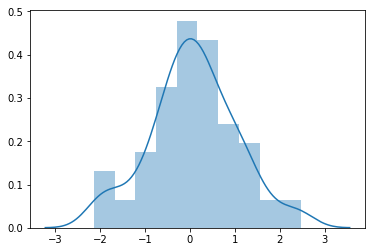

In [2]:
np.random.seed(10)
x = np.random.normal(size=100) 
sns.distplot(x) # plots both a histogram and kde

### Unfortunately, seaborn needs to be patched to get rid of this deprecated argument

C:\Users\miles\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


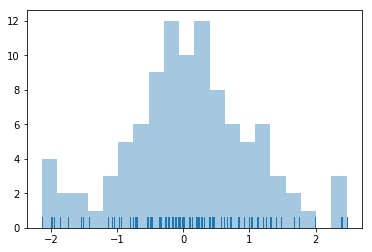

In [3]:
sns.distplot(x, kde=False, bins = 20, rug=True) # to have just the hist without the kde
# use bins to specify bins
# use rug to add a rug plot

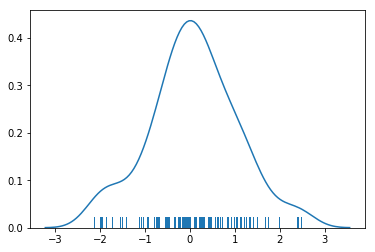

In [4]:
sns.distplot(x, hist=False, rug=True) # to get rid of histogram and have just kde

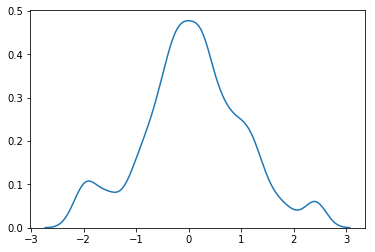

In [5]:
sns.kdeplot(x, bw = 0.2)  # if you want to change the badwidth parameter of the KDE, you must use kdeplot

# bivariate and multivariate plots

In [6]:
mean = [0, 0]
cov = [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

In [7]:
print(df.head())

          x         y
0  0.851992 -1.055465
1  0.564387  1.034139
2  0.325094 -0.075044
3 -0.167775  0.680434
4 -0.218499 -1.005768


C:\Users\miles\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


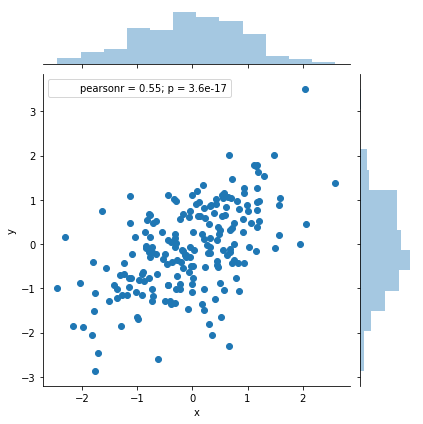

In [8]:
sns.jointplot(x='x', y='y', data = df)

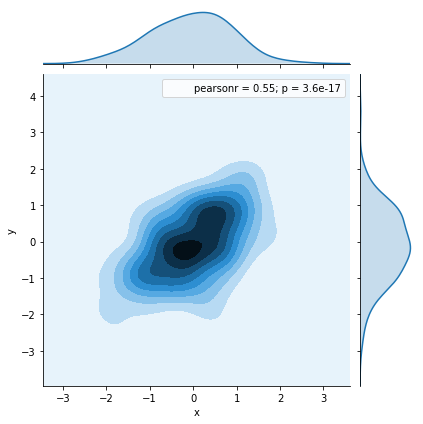

In [9]:
sns.jointplot(x="x", y="y", data=df, kind="kde") # for 2D KDE

## Pair-wise plots for multiple numeric data variables

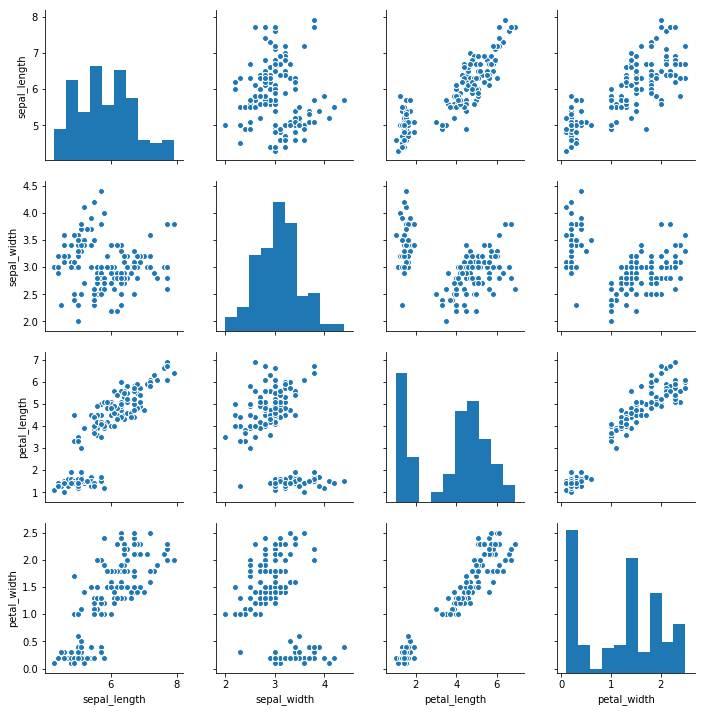

In [10]:
# good ol' iris data
iris = sns.load_dataset("iris")
sns.pairplot(iris)

# Univariate plots separated by category

In [18]:
tips = sns.load_dataset("tips")
print(tips.head())
print(tips.info())
# tips data, contains numeric vars: total_bill, tip, size
# categorical vars: sex, smoker, day, time

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


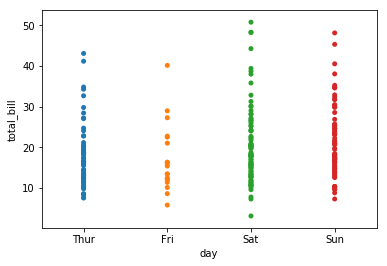

In [13]:
sns.stripplot(x="day", y="total_bill", data=tips)  # like a dotplot, but the dots are plotted on top of each other

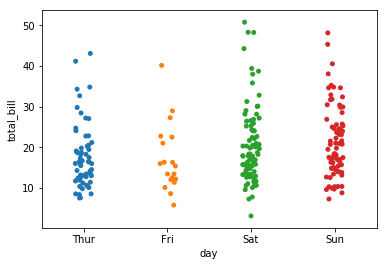

In [14]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True) # adding jitter allows us to see where points were overlapping

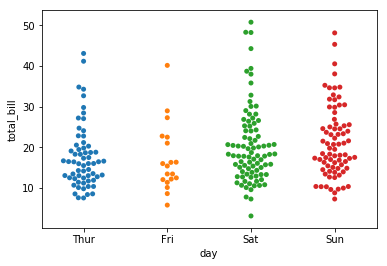

In [15]:
sns.swarmplot(x="day", y="total_bill", data=tips)  # swarmplots are like symmetric dotplots

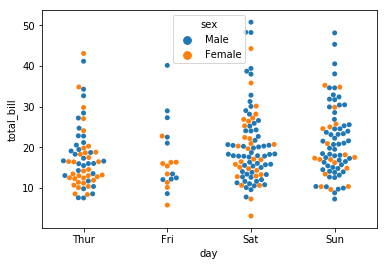

In [16]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
# you can change the color of the point based on another categorical variable
# seaborn automatically adds a legend

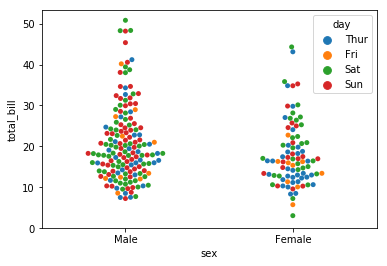

In [17]:
sns.swarmplot(x="sex", y="total_bill", hue="day", data=tips) 
# this plot is harder on the eyes, but contains the same info as above
# the data is separated based on sex and colored based on the day

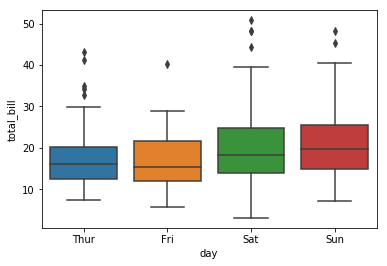

In [21]:
sns.boxplot(x="day", y="total_bill", data=tips) # boxplots

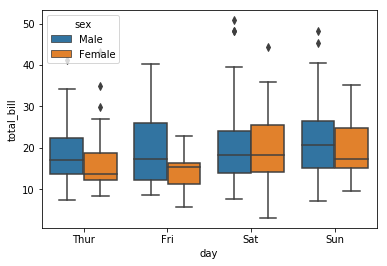

In [22]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips) # boxplots

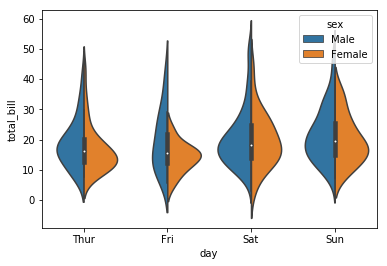

In [23]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True); # i'm not a huge fan of these plots

## facet grids to make several plots

C:\Users\miles\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


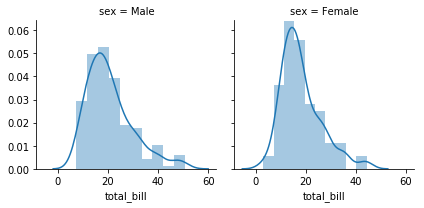

In [33]:
g = sns.FacetGrid(tips, col="sex", margin_titles=True)  # define the facet grid
# the facet grid will subset the data based on the categorical variable you provide it
g.map(sns.distplot, "total_bill", bins=10)
# you then 'map' a plot command (e.g. sns.distplot, or plt.hist) to the facet grid
# be sure to pass the appropriate arguments

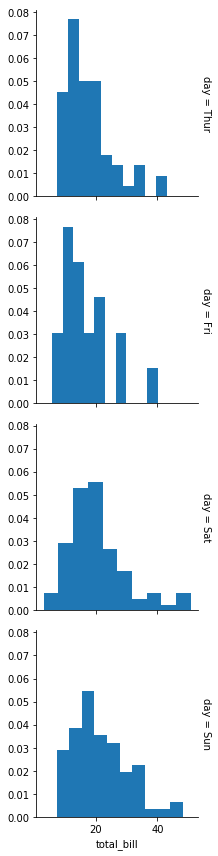

In [35]:
g = sns.FacetGrid(tips, row = 'day', margin_titles=True)
g.map(plt.hist, "total_bill", density = True, bins=10)

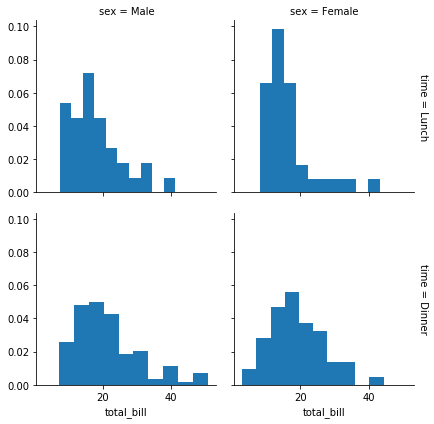

In [36]:
g = sns.FacetGrid(tips, row = 'time', col='sex', margin_titles=True) # you can even have a 2D facet grid
g.map(plt.hist, "total_bill", density = True, bins=10)

# bar charts (count plots) for data that is only categorical

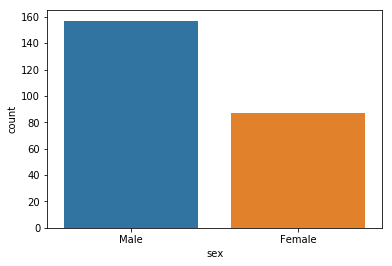

In [39]:
sns.countplot(x="sex",data=tips) 

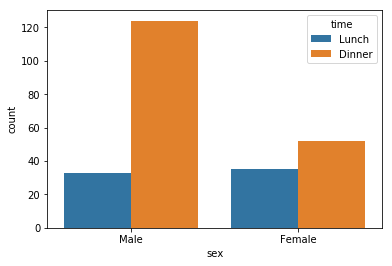

In [41]:
sns.countplot(x="sex",hue = 'time', data=tips) 

# fitting basic statistical models

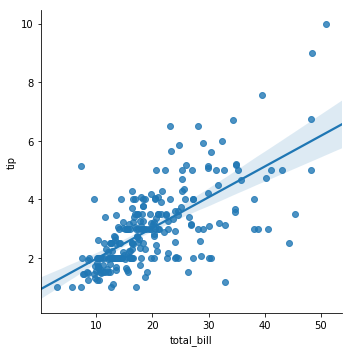

In [42]:
sns.lmplot(x="total_bill", y="tip", data=tips)

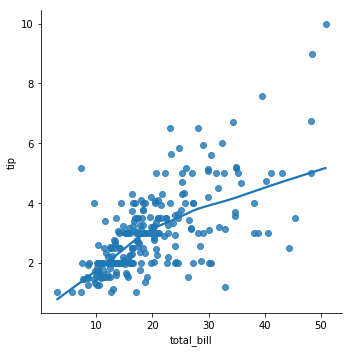

In [43]:
sns.lmplot(x="total_bill", y="tip", data=tips, lowess=True)

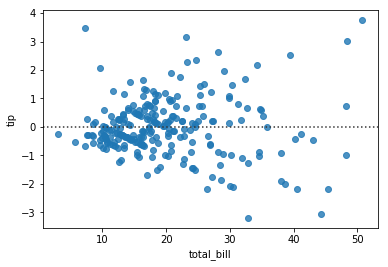

In [44]:
sns.residplot(x="total_bill", y="tip", data=tips)

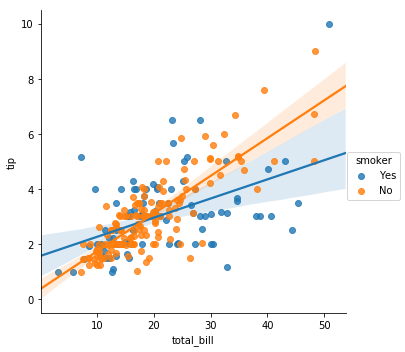

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)